In [179]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows',100)

We use the [Kaggle Olympic Athletes data set](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) to investigate changes of athletes' physique over time.
First, we load the data set and drop the columns we don't need.

In [180]:
df_athletes = pd.read_csv('./data/athlete_events.csv')
df_athletes.drop(columns=['Season','Games','Age','City'], inplace=True)

Next, we add a column for the *body mass index (BMI)* which will serve as a proxy to investigate athletes' strength.
We'll drop all rows that have missing values for both *Height* and *Weight*. If one value is missing, we have an NaN in the BMI row. However, we don't perform any modeling in this notebook, so the NaNs don't cause trouble when calculating first and second order statistics.

In [181]:
df_athletes.insert(5,"BMI",df_athletes.Weight/(df_athletes.Height/100)**2)
df_athletes.dropna(axis=0, how='all', subset=['Height','Weight'], inplace = True)
df_athletes.head(15)

,ID,Name,Sex,Height,Weight,BMI,Team,NOC,Year,Sport,Event,Medal
0,1,A Dijiang,M,180.0,80.0,24.691358,China,CHN,1992,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,170.0,60.0,20.761246,China,CHN,2012,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1988,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1988,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1992,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1992,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1994,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1994,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
10,6,Per Knut Aaland,M,188.0,75.0,21.220009,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,188.0,75.0,21.220009,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN


A quick look at the numeric values of the data set reveals that there are only few values missing.

In [182]:
df_athletes.describe()

,ID,Height,Weight,BMI,Year
count,212333.000000,210945.000000,208241.000000,206853.000000,212333.000000
mean,68502.581897,175.338970,70.702393,22.784520,1988.595866
std,38997.792368,10.518462,14.348020,2.912067,21.550974
min,1.000000,127.000000,25.000000,8.360954,1896.000000
25%,35027.000000,168.000000,60.000000,20.957171,1976.000000
50%,68536.000000,175.000000,70.000000,22.530864,1992.000000
75%,102189.000000,183.000000,79.000000,24.212293,2006.000000
max,135571.000000,226.000000,214.000000,63.901580,2016.000000


Next, we take a look at how much data we have for individual sports. We are interested in team sports where body size potentially matters a lot, such as basketball. 

We see that we have a good amount of data for ice hockey, football, hockey, basketball, water polo, handball, and volleyball.

In [183]:
df_athletes_counts = df_athletes.groupby(['Sport','Event']).count().sort_values(by='ID', ascending=False)
df_athletes_counts.head(25)

,,ID,Name,Sex,Height,Weight,BMI,Team,NOC,Year,Medal
Sport,Event,,,,,,,,,,
Ice Hockey,Ice Hockey Men's Ice Hockey,3871,3871,3871,3857,3839,3825,3871,3871,3871,1025
Football,Football Men's Football,3663,3663,3663,3662,3549,3548,3663,3663,3663,797
Hockey,Hockey Men's Hockey,2913,2913,2913,2910,2877,2874,2913,2913,2913,738
Basketball,Basketball Men's Basketball,2633,2633,2633,2630,2471,2468,2633,2633,2633,632
Water Polo,Water Polo Men's Water Polo,2300,2300,2300,2300,2236,2236,2300,2300,2300,601
Cycling,"Cycling Men's Road Race, Individual",2171,2171,2171,2165,2126,2120,2171,2171,2171,49
Handball,Handball Men's Handball,2053,2053,2053,2053,2052,2052,2053,2053,2053,516
Volleyball,Volleyball Men's Volleyball,1788,1788,1788,1788,1782,1782,1788,1788,1788,490
Athletics,Athletics Men's Marathon,1643,1643,1643,1640,1623,1620,1643,1643,1643,73


Let's take a quick look at the number of *Height* and *Weight* measurements we have for our three sports. From 1960 on, we have at least 100 samples for each sport, which seems reasonable. Thus, we decide to look at all years starting at 1960.

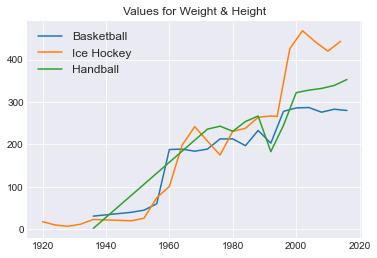

In [117]:
sports_list = ['Basketball','Ice Hockey','Handball']
for sport in sports_list:
    plt.plot(df_athletes[(df_athletes.Sport == sport)].groupby(['Year']).count()['BMI'])
plt.title('Values for Weight & Height')
plt.legend(sports_list)
plt.show()

## Part I: Changes in Body Size

We first consider the evolution of *height* over time. A good way of displaying distributions are violin plots. 
As an example, we plot the height distributions for basketball for all olympic games 

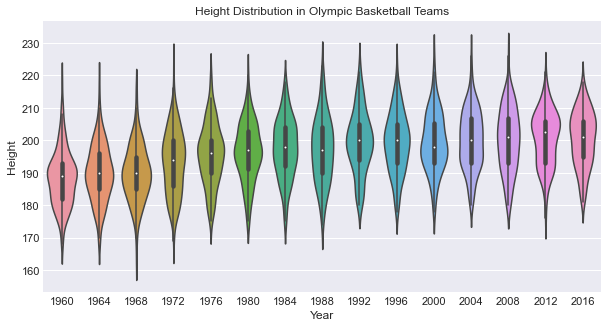

In [185]:
# data frame with all basketball players
df_athletes_basketball = df_athletes[(df_athletes.Sex == 'M')&(df_athletes.Sport == 'Basketball')&(df_athletes.Year >= 1960)]
# violin plot
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x='Year', y='Height', data = df_athletes_basketball, ax=ax)
ax.set_title('Height Distribution in Olympic Basketball Teams')
#sns.set(font_scale=1)
plt.show()
   

A quick comparison reveals that mean and median do not differ much. Still, we choose to work with the median to limit the effect of outliers.

In [188]:
display(df_athletes[(df_athletes.Sex == 'M')&(df_athletes.Sport == 'Basketball')].groupby('Year').mean())
display(df_athletes[(df_athletes.Sex == 'M')&(df_athletes.Sport == 'Basketball')].groupby('Year').median())

,ID,Height,Weight,BMI
Year,,,,
1936,66443.777778,182.574074,79.903226,23.566471
1948,59995.771429,185.550725,81.902439,23.272793
1952,65711.405941,187.600000,84.586957,23.400231
1956,62134.686047,186.952941,86.000000,24.210425
1960,65184.765625,188.317708,84.037234,23.628138
1964,62718.042328,189.920635,84.544974,23.382907
1968,64984.836957,189.880435,83.820652,23.186829
1972,62677.373684,193.321053,86.740741,23.156713
1976,66213.042553,195.680851,88.872340,23.172680


,ID,Height,Weight,BMI
Year,,,,
1936,71925.0,183.0,79.0,23.407509
1948,59428.5,183.0,80.0,23.149893
1952,65614.0,188.0,84.0,23.148148
1956,56450.0,187.0,85.0,24.221453
1960,71127.5,189.0,83.0,23.556169
1964,60324.0,190.0,84.0,23.245985
1968,66835.0,190.0,83.0,23.155761
1972,58935.5,194.0,86.0,23.143556
1976,62941.0,196.0,88.0,23.038752


Below, we define a function that plots the median height for each year.

In [189]:
def plot_stuff(sport_list=['Basketball'],sex='M',metric='Height', min_year = 0, plot_medal = True):
    """ Plots the median metric for each year for different sports
    
        Args:
            sports_list (str or list): list of sports to be plotted
            sex (str)
            metric (str): Height, Weight, or BMI
            min_year (int)
            plot_medal (bool): whether or not to include gold medalists
    """
    plt.subplots(figsize=(10,6))
    if type(sport_list) != list:
        sport_list = [sport_list]
    legend_list = []
    for sport in sport_list:
        id_bool = (df_athletes['Sex'] == sex) & (df_athletes['Sport'] == sport)\
                & (df_athletes['Year'] > min_year) 
        df_tot = df_athletes.loc[id_bool]
        plt.plot(df_tot.groupby('Year').median()[metric])
        legend_list.append('{}'.format(sport))
    if plot_medal:
        plt.gca().set_prop_cycle(None)        
        for sport in sport_list:            
            id_bool_gold = (df_athletes['Sex'] == sex) & (df_athletes['Sport'] == sport)\
                    & (df_athletes['Year'] > min_year) & (df_athletes['Medal'] == 'Gold')
            df_gold = df_athletes.loc[id_bool_gold]
            plt.plot(df_gold.groupby('Year').mean()[metric],'--',alpha=0.6)        
    if plot_medal:    
        plt.title(metric+', Gold medalists dashed')
    else:
        plt.title('Median Athlete ' + metric)
    plt.legend(legend_list)
    plt.rc('legend', fontsize=12)
    plt.rc('axes', labelsize=12)    
    plt.show()


We plot the median athletes' height.

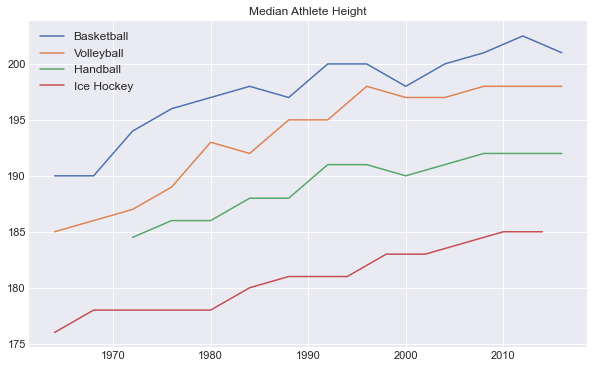

In [190]:
plot_stuff(sport_list=['Basketball', 'Volleyball','Handball','Ice Hockey'], metric='Height', min_year = 1960, plot_medal = False)

## Part II: Do you even lift?

We plot the median athletes' BMI.

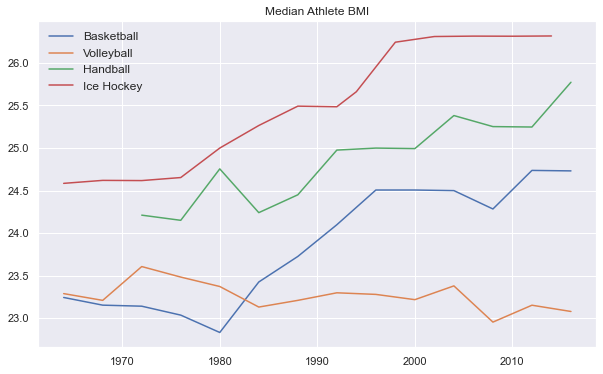

In [149]:
plot_stuff(sport_list=['Basketball', 'Volleyball','Handball','Ice Hockey'], metric='BMI', min_year = 1960, plot_medal = False)

# Part III: Champions vs. Average

Next, we'll look at what can be said about the gold medalists versus the average in every year. We can plot the median BMI in this case (gold medalists dashed).

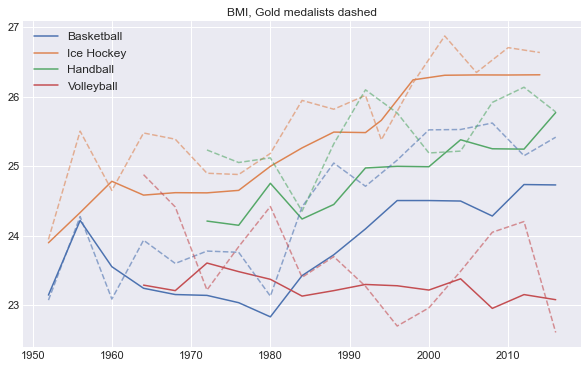

In [191]:
plot_stuff(sport_list=['Basketball','Ice Hockey','Handball','Volleyball'], metric='BMI', min_year = 1950)

However, this plot seems a bit messy. A different way to gain insight is by showing the difference between gold medal and average. To have more information in one picture, we'll do this in a scatter plot.

In [206]:
def scatter_medal(sport_list=['Basketball'],sex='M',metric='Height', min_year = 0):
    """ Plots the median metric for each year for different sports
    
        Args:
            sports_list (str or list): list of sports to be plotted
            sex (str)
            metric (str): Height, Weight, or BMI
            min_year (int)
            plot_medal (bool): whether or not to include gold medalists
    """
    plt.subplots(figsize=(10,6))
    if type(sport_list) != list:
        sport_list = [sport_list]
    legend_list = []
    for sport in sport_list:
        # data frame for all athletes
        id_bool = (df_athletes['Sex'] == sex) & (df_athletes['Sport'] == sport)\
                & (df_athletes['Year'] > min_year) 
        df_tot = df_athletes.loc[id_bool]
        # data frame for gold medalists
        id_bool_gold = (df_athletes['Sex'] == sex) & (df_athletes['Sport'] == sport)\
                    & (df_athletes['Year'] > min_year) & (df_athletes['Medal'] == 'Gold')
        df_gold = df_athletes.loc[id_bool_gold]        
#        plt.plot(df_tot.groupby('Year').median()[metric])
        plt.scatter(df_gold.groupby('Year').median()['Height'] - df_tot.groupby('Year').median()['Height']\
                  , df_gold.groupby('Year').median()['Weight'] - df_tot.groupby('Year').median()['Weight'])        
        legend_list.append('{}'.format(sport))
     
        #color = next(ax._get_lines.prop_cycler)['color']
        #legend_list.append('{}: winners'.format(sport))
        plt.ylim(-12, 12)
        plt.xlim(-12, 12)
    
    plt.title('Gold Medalists minus Average')
    plt.legend(legend_list)
    plt.xlabel('Height Difference')
    plt.ylabel('Weight Difference')
    plt.rc('legend', fontsize=12)
    plt.rc('axes', labelsize=12)    
    plt.show()

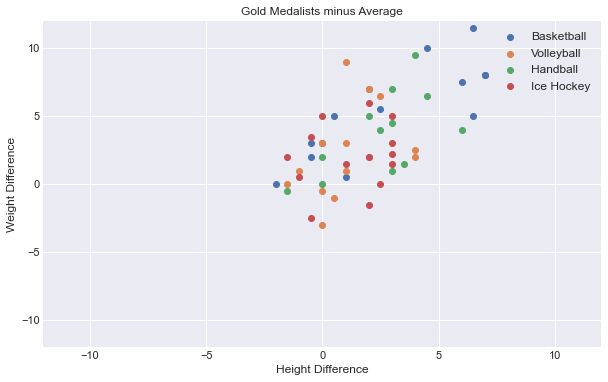

In [207]:
scatter_medal(['Basketball', 'Volleyball','Handball','Ice Hockey'], min_year = 1960)

